<a href="https://colab.research.google.com/github/SuhailAhmad1/Machine_learning/blob/main/KNN_Classification_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Important Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pprint

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score, RandomizedSearchCV, GridSearchCV, learning_curve

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# **KNN Classification | MNIST dataset | Handwritten Recognition**

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X = X.to_numpy()
y = y.to_numpy()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Binary Classification**

In [5]:
#Changing labels to -1 and 1
y_train_0 = -1*np.ones(len(y_train))
y_test_0 = -1*np.ones(len(y_test))

index_0 = np.where(y_train == '0')
y_train_0[index_0] = 1
index_0 = np.where(y_test == '0')
y_test_0[index_0] = 1

In [6]:
print(y_train)
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[-1.  1. -1. ... -1. -1. -1.]


In [7]:
print(y_test[10:30])
print(y_test_0[10:30])

['0' '6' '9' '0' '1' '5' '9' '7' '3' '4' '9' '6' '6' '5' '4' '0' '7' '4'
 '0' '1']
[ 1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
  1. -1.]


**Data Visualization in Lower Dimention Using PCA**

In [14]:
pipe_pca_2d = make_pipeline(MinMaxScaler(), PCA(n_components=2))
X_train_pca_2d = pipe_pca_2d.fit_transform(X_train)

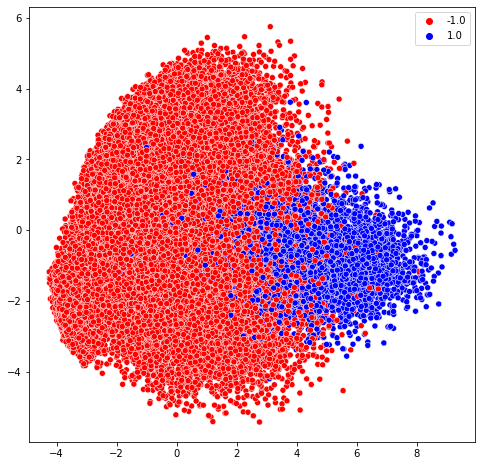

In [24]:
from matplotlib.colors import ListedColormap
import seaborn as sns
cmap = ListedColormap(['r','b'])
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_train_pca_2d[:,0], y=X_train_pca_2d[:,1],hue =y_train_0, palette=cmap)
plt.show()

**KNNClassifier**

In [25]:
pipe_knn_bin = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))

In [26]:
pipe_knn_bin.fit(X_train, y_train_0)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

In [35]:
pipe_knn_bin.score(X_test, y_test_0)

0.9965

In [28]:
y_hat_test_0 = pipe_knn_bin.predict(X_test)

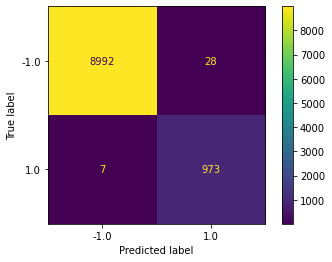

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0)

In [34]:
print(classification_report(y_test_0, y_hat_test_0))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      9020
         1.0       0.97      0.99      0.98       980

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



**MultiClass Classification**

In [39]:
pipe_knn_mc = make_pipeline( MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))

In [40]:
pipe_knn_mc.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

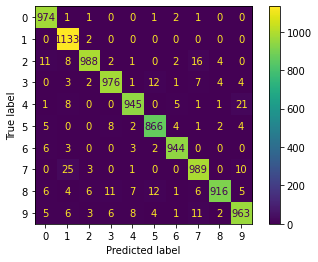

In [41]:
y_hat = pipe_knn_mc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [42]:
pipe_knn_mc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [46]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Checking Predictions**

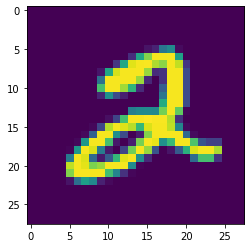

In [61]:
plt.imshow(X_train[5].reshape(28,28))
plt.show()

In [53]:
print("Actual Label for Above image is : ", y_train[5])
print("Predicted Label for Above image is : ",pipe_knn_mc.predict(X_train[5].reshape(1,-1))[0])

Actual Label for Above image is :  2
Predicted Label for Above image is :  2


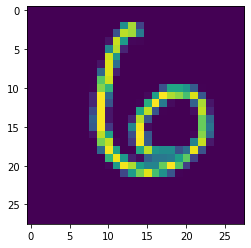

In [58]:
plt.imshow(X_test[100].reshape(28,28))
plt.show()

In [56]:
print("Actual Label for Above image is : ", y_test[100])
print("Predicted Label for Above image is : ",pipe_knn_mc.predict(X_test[100].reshape(1,-1))[0])

Actual Label for Above image is :  6
Predicted Label for Above image is :  6


# **KNN In Regression**

In [1]:
import sklearn
assert sklearn.__version__>='0.20'

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
X, y = fetch_california_housing(return_X_y = True)

In [6]:
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

Shape of X :  (20640, 8)
Shape of y :  (20640,)


**Splitting data**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [8]:
print("Shape of Training Fetaure Matrix : ", X_train.shape)
print("Shape of Test Fetaure Matrix : ", X_test.shape)

Shape of Training Fetaure Matrix :  (14448, 8)
Shape of Test Fetaure Matrix :  (6192, 8)


**Model**

In [9]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scalar', MinMaxScaler()),
                 ('knn', KNeighborsRegressor(n_neighbors=2))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=2))])

In [10]:
y_hat = pipe.predict(X_test)
error = mean_squared_error(y_test, y_hat, squared=False)
print(error)

0.6767822465759739


**Manual HPT with cross_validation**

In [11]:
rmse_val = []

for k in range(1,31):
  pipe = Pipeline([('scalar', MinMaxScaler()),
                 ('knn', KNeighborsRegressor(n_neighbors=k))])
  pipe.fit(X_train, y_train)
  y_hat = pipe.predict(X_test)
  error = mean_squared_error(y_test, y_hat, squared=False)
  rmse_val.append(error)

In [16]:
print(rmse_val[:10])

[0.7640415519491153, 0.6767822465759739, 0.6528807794310142, 0.6405363672504784, 0.6313551708664618, 0.6255268557053962, 0.6229026195917569, 0.6204175761575943, 0.6195418732794183, 0.6195473252868735]


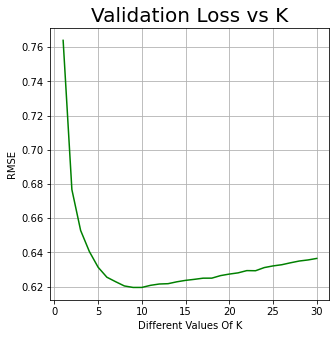

In [18]:
plt.figure(figsize=(5,5))

plt.plot(range(1, len(rmse_val)+1), rmse_val, color='green')
plt.xlabel("Different Values Of K")
plt.ylabel("RMSE")
plt.grid(True)
plt.title("Validation Loss vs K", fontsize=20)
plt.show()

In [17]:
#Best K is when rmse is lowest
print("Lowest RMSE comes when k = ", np.argmin(rmse_val)+1)

Lowest RMSE comes when k =  9


**HPT using GridSearchCV**

In [22]:
param_grid = {'knn__n_neighbors' : list(range(1,31))}
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('knn', KNeighborsRegressor())])
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=10,
                  n_jobs=1,
                  return_train_score=True,
                  )
gs.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             return_train_score=True)

In [25]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])

In [26]:
gs.best_params_

{'knn__n_neighbors': 6}

Polynomial Features

In [28]:
params = {'poly__degree': [1,2,3],
          'knn__n_neighbors': [6,7,8,9,10,11]}
pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('scaler', MinMaxScaler()),
                 ('knn', KNeighborsRegressor())])

gs = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  cv=10,
                  n_jobs=-1)

gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [6, 7, 8, 9, 10, 11],
                         'poly__degree': [1, 2, 3]})

In [29]:
gs.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])

Evaluate the best Model

In [31]:
y_hat = gs.best_estimator_.predict(X_test)
error = mean_squared_error(y_test, y_hat, squared=False)
print(error)

0.6255268557053962
